In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\u353822\Documents\GitHub\University-of-Chicago1\University of Chicago\Machine Learning\HW1\bottle.csv', low_memory=False)

In [3]:
#Part A 
#1 We will increase the complexity of our model slightly by increasing the number of features.
#2 Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
df = df[['T_degC', 'Salnty', 'STheta' , 'O2ml_L', 'Depthm']]
df = df.dropna(how='any')
print(df.shape)

(661268, 5)


In [4]:
#Part A 
#3 Remove any STheta outliers (same as HW #1). 
df = df[np.abs(df.STheta -df.STheta.mean()) <= (5*df.STheta.std())]
df.shape

(661268, 5)

In [5]:
#Part B 
#1  Create X & y objects
X = df[['Salnty', 'STheta' , 'O2ml_L', 'Depthm']]
y = df['T_degC']
y = np.asarray(y)
y = y.reshape(len(y),1)

In [6]:
#Part B 
#2  Generate X_train, X_test, y_train & y_test. 
X_train , X_test, y_train, y_test=  train_test_split(X,y, test_size=0.2, random_state=42)

In [7]:
#Part B 
#3 Scale all features to improve convergence in Gradient Descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Part C 
#1 Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train. 
#2 Print out the coefficients (including the intercept)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print(lin_reg.coef_, lin_reg.intercept_)

[[ 1.63046569 -4.6345913   0.3020677  -0.47495536]] [10.91541795]


In [9]:
#Part C 
#3  Predict T_degC for the test data using lin_reg
y_pred_sklearn = lin_reg.predict(X_test_scaled)

In [10]:
#Part C 
#4 Calculate the following for the test data
print(skm.mean_squared_error(y_test,y_pred_sklearn),skm.r2_score(y_test,y_pred_sklearn),skm.explained_variance_score(y_test,y_pred_sklearn))

0.1110111720543363 0.9937682503632342 0.9937684088237414


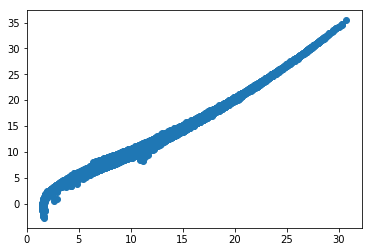

In [11]:
# Part C 
#5 Create a scatterplot that shows actual versus predicted values for the T_degC
plt.scatter(y_test,y_pred_sklearn)
plt.show()

In [12]:
#Part D 
#1 add a column of 1s to X_train_scaled and X_test_scaled
X_train_b0 = np.ones(shape=(X_train_scaled.shape[0],1))
X_test_b0 = np.ones(shape=(X_test_scaled.shape[0],1))
X_train_all = np.concatenate((X_train_b0, X_train_scaled),1)
X_test_all = np.concatenate((X_test_b0, X_test_scaled),1)

In [13]:
X_test_all.shape

(132254, 5)

MSE, r-squared, and explained variance for test data
0.11152883696530862 0.9937391906023001 0.9937419971480342
MSE by epochs


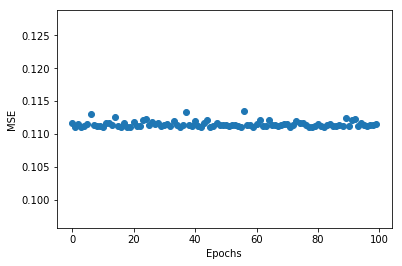

Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.


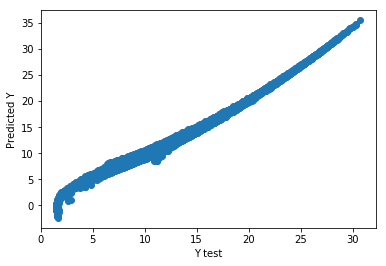

MSE, r-squared, and explained variance for train data
0.11116875268393259 0.9937737310738569 0.993778055523505


In [14]:
#Part D
#3 Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.
eta = .01
epochs = 100
minibatch_size = 50
m = len(y_train)

#Initialize random theta values to start
np.random.seed(42)
theta = np.random.randn(5,1)

#Initialize empty list
cost_list = []
iter_list=[]
gradient_list=[]

j=0

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)    
    X_b_shuffled = X_train_all[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]

    for i in range(0,m,minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size *xi.T.dot(xi.dot(theta)-yi)
        theta = theta - eta * gradients
        
    gradient_list.append(gradients)

    #2 The cost function we will use for Gradient Descent is MSE 
    cost_function = skm.mean_squared_error((X_test_all.dot(theta)), y_test)
    cost_list.append(cost_function)
    iter_list.append(j)
    j += 1
    
#Part D
#4 Calculate the following for the test data:
#- mean squared error
#- r-squared 
#- explained variance
y_pred = X_test_all.dot(theta) 
print("MSE, r-squared, and explained variance for test data")
print(skm.mean_squared_error(y_test, y_pred),skm.r2_score(y_test,y_pred),skm.explained_variance_score(y_test,y_pred))


print("MSE by epochs")
plt.scatter(iter_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
print("Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.")
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()


#Part D
#6 Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data.
y_pred_train = X_train_all.dot(theta)
print("MSE, r-squared, and explained variance for train data")
print(skm.mean_squared_error(y_train, y_pred_train),skm.r2_score(y_train,y_pred_train),skm.explained_variance_score(y_train,y_pred_train))

MSE, r-squared, and explained variance for test data
0.11102439226420989 0.9937675082303791 0.9937675085547484
MSE by epochs


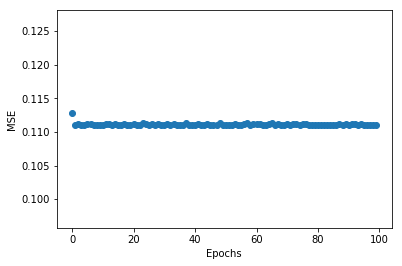

Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.


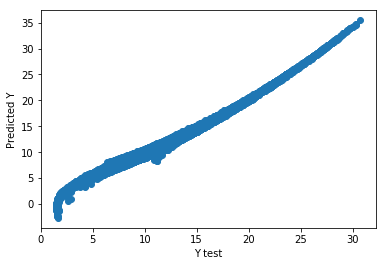

MSE, r-squared, and explained variance for train data
0.11062210325802208 0.9938043474678693 0.9938044923958621


In [15]:
#Part D
#3 Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.
eta = .01
epochs = 100
minibatch_size = 250
m = len(y_train)

#Initialize random theta values to start
np.random.seed(42)
theta = np.random.randn(5,1)

#Initialize empty list
cost_list = []
iter_list=[]
gradient_list=[]

j=0

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)    
    X_b_shuffled = X_train_all[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]

    for i in range(0,m,minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size *xi.T.dot(xi.dot(theta)-yi)
        theta = theta - eta * gradients
        
    gradient_list.append(gradients)

    #2 The cost function we will use for Gradient Descent is MSE 
    cost_function = skm.mean_squared_error((X_test_all.dot(theta)), y_test)
    cost_list.append(cost_function)
    iter_list.append(j)
    j += 1
    
#Part D
#4 Calculate the following for the test data:
#- mean squared error
#- r-squared 
#- explained variance
y_pred = X_test_all.dot(theta) 
print("MSE, r-squared, and explained variance for test data")
print(skm.mean_squared_error(y_test, y_pred),skm.r2_score(y_test,y_pred),skm.explained_variance_score(y_test,y_pred))


print("MSE by epochs")
plt.scatter(iter_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
print("Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.")
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()


#Part D
#6 Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data.
y_pred_train = X_train_all.dot(theta)
print("MSE, r-squared, and explained variance for train data")
print(skm.mean_squared_error(y_train, y_pred_train),skm.r2_score(y_train,y_pred_train),skm.explained_variance_score(y_train,y_pred_train))

MSE, r-squared, and explained variance for test data
0.11101307654956008 0.993768143452036 0.9937682222787135
MSE by epochs


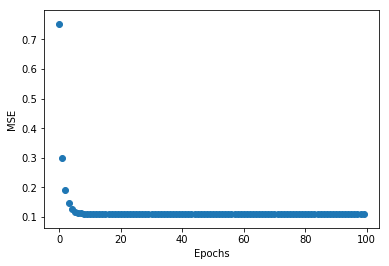

Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.


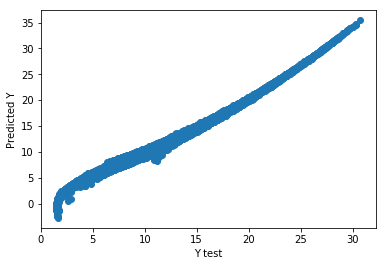

MSE, r-squared, and explained variance for train data
0.11059766038765509 0.9938057164486356 0.9938057302206429


In [16]:
#Part D
#3 Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.
eta = .01
epochs = 100
minibatch_size = 2000
m = len(y_train)

#Initialize random theta values to start
np.random.seed(42)
theta = np.random.randn(5,1)

#Initialize empty list
cost_list = []
iter_list=[]
gradient_list=[]

j=0

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)    
    X_b_shuffled = X_train_all[shuffled_indices]
    y_shuffled = y_train[shuffled_indices]

    for i in range(0,m,minibatch_size):
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size *xi.T.dot(xi.dot(theta)-yi)
        theta = theta - eta * gradients
        
    gradient_list.append(gradients)

    #2 The cost function we will use for Gradient Descent is MSE 
    cost_function = skm.mean_squared_error((X_test_all.dot(theta)), y_test)
    cost_list.append(cost_function)
    iter_list.append(j)
    j += 1
    
#Part D
#4 Calculate the following for the test data:
#- mean squared error
#- r-squared 
#- explained variance
y_pred = X_test_all.dot(theta) 
print("MSE, r-squared, and explained variance for test data")
print(skm.mean_squared_error(y_test, y_pred),skm.r2_score(y_test,y_pred),skm.explained_variance_score(y_test,y_pred))


print("MSE by epochs")
plt.scatter(iter_list, cost_list)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()
print("Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.")
plt.scatter(y_test,y_pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.show()


#Part D
#6 Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data.
y_pred_train = X_train_all.dot(theta)
print("MSE, r-squared, and explained variance for train data")
print(skm.mean_squared_error(y_train, y_pred_train),skm.r2_score(y_train,y_pred_train),skm.explained_variance_score(y_train,y_pred_train))

Part E: Conceptual Questions

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.
Parameter estimation through the normal equation is solved through B=((X'X)^-1)X'Y which can be computationally expensive when solving for thousands of parameters with very large data sets. Paremeter estimation through Gradient Descent differs in that it uses a different equation in an attempt to obtain the most precise slope(s) and intercept. A cost function is used in Gradient Descent which measures how well a set of parameters fits the training data. As the line gains a better fit of the data through the new parameters, the cost function will be reduced. For example, Lets say we have a line with two parameters which are attempting to predict another paramter. If we were to plot all potential combinations of the two parameters with the associated cost function, we would find the cost functiuon to have a valley shape. With gradient descent, we attempt to move towards the bottom of the valley to find the minimum loss of our cost function with the associated intercept and slope parameters. The speed with which our function moves down this valey is called the Learning Rate parameter. The Gradient parameter tells us how much we need to mutliply our learning rate which will then be reduced from our theta in the equation theta = theta - learning_rate * gradient. The larger the gradient, the more theta will be reduced and the faster we will move towards the bottom of the valley. As we begin reaching the bottom of the valley, the gradient will become smaller due to the slope approaching 0 which allows the function not to skip pass the minima. Gradient is calculated through the following equation: gradient = 2/minibatch_size *xi.T.dot(xi.dot(theta)-yi). Once the gradient reaches 0 or close to 0, theta will equal theta, and we will have obtained our final coefficients for our parameters. 

2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?
In SGD, one data point is used for every step within the iterative process of attaining the right theta(s) in hope of moving closer to the minima of our cost function. This process is often noisier than mini batch since only one data point is being analyzed at a time. With Mini-Batch Gradient Descent, a portion of the data (more than one point) is used when calculating the gradient which allows for a speedier process to the local minima since gradient descent is being applied to groups of data points instead of one at a time.

3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.
I would argue the different batch sizes produced similar results with regards to how we measured accuracy for this data set. As can be seen below, the differing batch sizes doesn't seem to produce different results when we compare our model did on test data compared to train data. I don't see signs of overfitting because the test data seems to have an equally good fit as the train data for all models. We say this because the MSE, r-squared, and explained variance are nearly the same, regardless of batch size. 

Batch size: 50
MSE, r-squared, and explained variance for test data
0.11152883696530862 0.9937391906023001 0.9937419971480342
MSE, r-squared, and explained variance for train data
0.11116875268393259 0.9937737310738569 0.993778055523505

Batch size: 250
MSE, r-squared, and explained variance for test data
0.11102439226420989 0.9937675082303791 0.9937675085547484
MSE, r-squared, and explained variance for train data
0.11062210325802208 0.9938043474678693 0.9938044923958621

Batch size: 2000
MSE, r-squared, and explained variance for test data
0.11101307654956008 0.993768143452036 0.9937682222787135
MSE, r-squared, and explained variance for train data
0.11059766038765509 0.9938057164486356 0.9938057302206429

4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?
Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect to the loss gradient. The lower the value, the slower we travel along toward the minima. This is expressed through the equation theta = theta - learning_rate * gradient, where theta will slowly be reduced because of a low learning rate.  While using a low learning rate may be wise in terms of making sure that we do not miss any local minima, it could also mean that we’ll be taking a long time to converge — especially if we get stuck on a plateau region. When setting your learning rate, a larger rate should initially be used to move down towards the minima of the loss function. It is often helpful to change the learning rate to a lower number once we have begun reaching the bottom of the cost function to pin point the narrowest part of the loss function in order to obtain the most accurate readings for our parameters.  

5) Why would a data scientist want to use early stopping in gradient descent?
When our test accuracy begins decreasing within the iterative process of gradient descent, the model is being overfitted to the training data, and the model must stop being trained on the train data to stop overfitting. Early stopping provides guidance as to how many iterations can be run before the model begins to over-fit the training data. We don't want to over-fit our model on the training data because it will provide a bad fit for our test data. 